
# Mini Project: Data Visualization

---

## About the Dataset:

| Column Name        | Data Type | Description                                                                 |
|--------------------|-----------|-----------------------------------------------------------------------------|
| species            | Factor    | Denotes penguin species (Adélie, Chinstrap, Gentoo)                         |
| island             | Factor    | Denotes island in Palmer Archipelago, Antarctica (Biscoe, Dream, Torgersen) |
| bill_length_mm     | Double    | Bill length in millimeters                                                  |
| bill_depth_mm      | Double    | Bill depth in millimeters                                                   |
| flipper_length_mm  | Integer   | Flipper length in millimeters                                               |
| body_mass_g        | Integer   | Body mass in grams                                                          |
| sex                | Factor    | Denotes penguin sex (female, male)                                          |

---

## Data Loading and Cleaning



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Palmer Penguins Dataset.csv')

print("### Dataset Preview")
display(df.head())
print("\n### Dataset Information")
df.info()
print("\n### Dataset Summary Statistics")
display(df.describe())

### Dataset Preview


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007



### Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB

### Dataset Summary Statistics


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


We see all columns are the correct type, also the columns `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, `body_mass_g` and `sex` have missing values. The outliers are negligible and represented graphically nore in advance when we see the boxplots.

In [3]:
print("\n### Missing Values")
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_table = pd.DataFrame({'Missing Values': missing_data, 'Percentage (%)': missing_percentage})
display(missing_table)


### Missing Values


,Missing Values,Percentage (%)
species,0,0.000000
island,0,0.000000
bill_length_mm,2,0.581395
bill_depth_mm,2,0.581395
flipper_length_mm,2,0.581395
body_mass_g,2,0.581395
sex,11,3.197674
year,0,0.000000


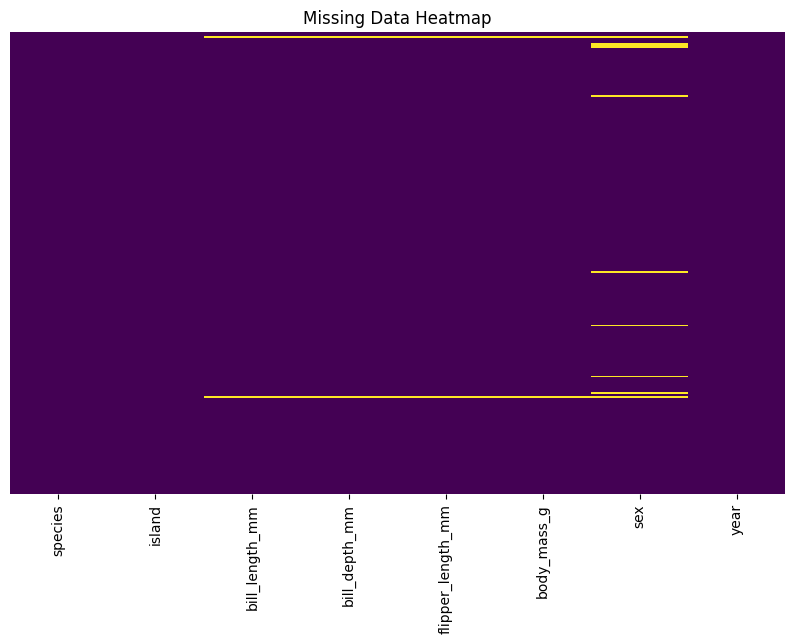

In [4]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()

Given the small amount of rows with missing values, we just drop them.

In [5]:
df = df.dropna()
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


None

## EDA



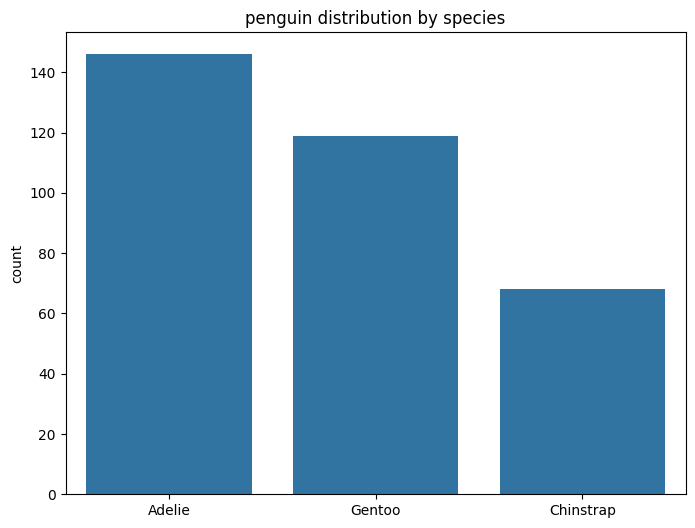

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='species', data=df)
plt.title('penguin distribution by species')
plt.xlabel('')
plt.ylabel('count')
plt.show()

In the penguin distribution by species plot, we see Adeile species is the most populous, followed by Gentoo and Chinstrap. Adeile population doubles the Chinstrap pop.

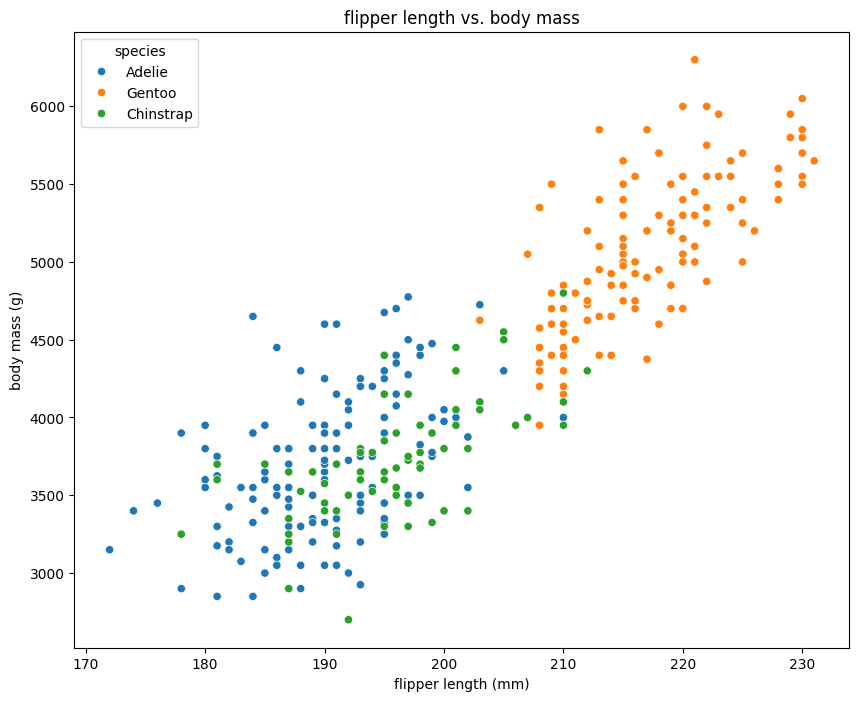

In [7]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='species', data=df)
plt.title('flipper length vs. body mass')
plt.xlabel('flipper length (mm)')
plt.ylabel('body mass (g)')
plt.show()

In the scatterplot of flipper length versus body mass, we observe that body mass and flipper length have a positive, seemingly linear correlation. Adélie and Chinstrap penguins share the same range and completely overlap, while Gentoo penguins have a similar range in length but are right-displaced (i.e. are bigger).

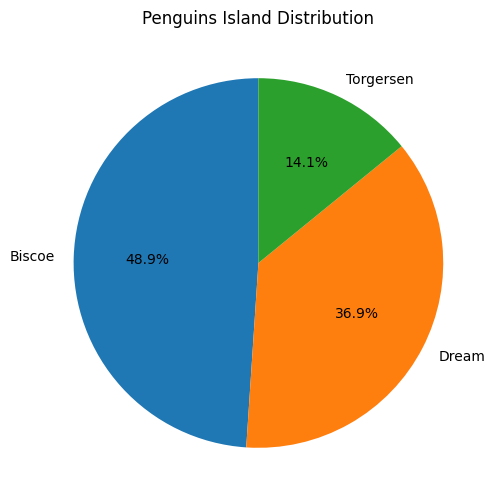

In [8]:
plt.figure(figsize=(8, 6))
df['island'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Penguins Island Distribution')
plt.ylabel('')
plt.show()

From the pie plot we extract that Biscoe has almost half the total population, the smaller population is in Torgesen island (only 14% of total).

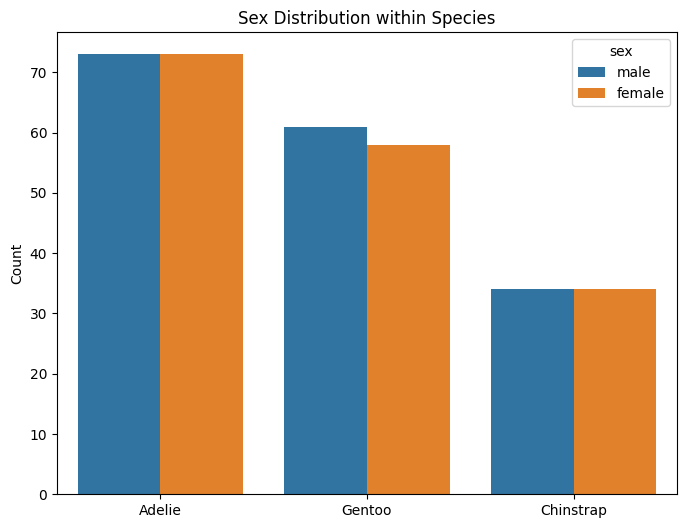

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='species', hue='sex', data=df)
plt.title('Sex Distribution within Species')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In the grouped bar charts, we see that the male/female ratio is 1:1, except for Gentoo penguins, which have a slightly bigger proportion of males.

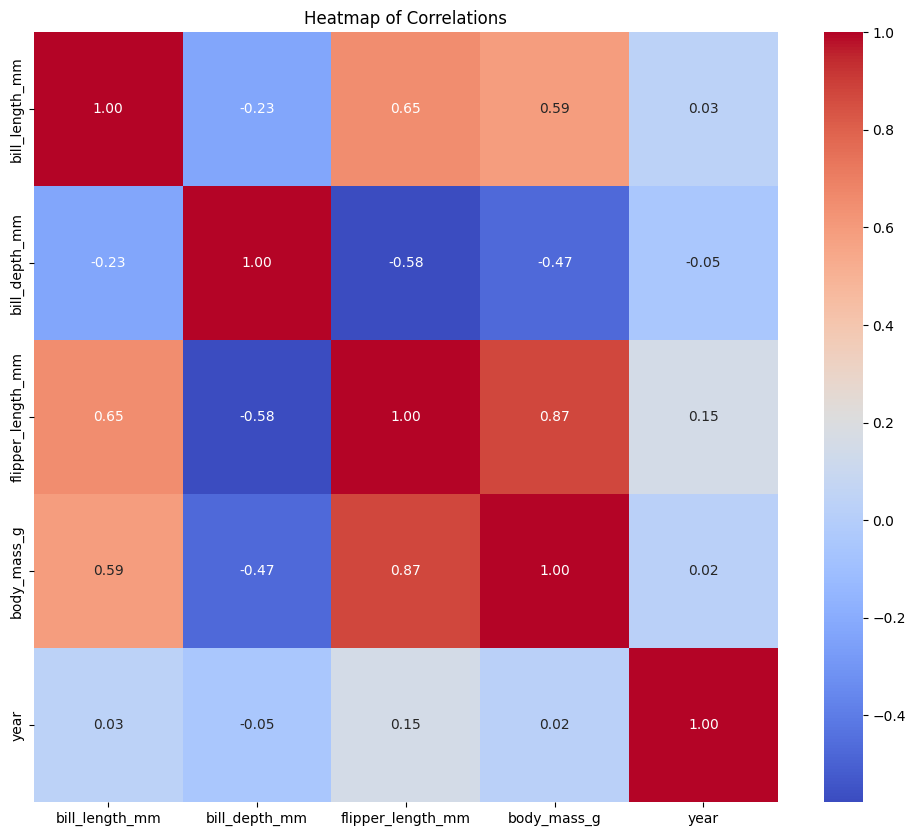

In [10]:
# first need a correlation matrix
numerical_columns = df.select_dtypes(include=[np.number]).columns
# df = df[numerical_columns]
correlation_matrix = df[numerical_columns].corr()

# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlations')
plt.show()


| Correlation Strength   | Positive Correlation | Negative Correlation |
|------------------------|----------------------|----------------------|
| Strong                 | 0.7 to 1.0           | -0.7 to -1.0         |
| Moderate               | 0.5 to 0.7           | -0.5 to -0.7         |
| Weak                   | 0.3 to 0.5           | -0.3 to -0.5         |
| Very Weak / No Correlation | -0.3 to 0.3       | -0.3 to 0.3          |

In the heatmap of correlations, we observe that flipper length and body mass have a strong positive correlation (as one increases, so does the other). Bill length and flipper length are moderately correlated. Bill depth is negatively correlated with both bill length and flipper length (as one increases, the other decreases). Note this plot doesnt differentiate between species.

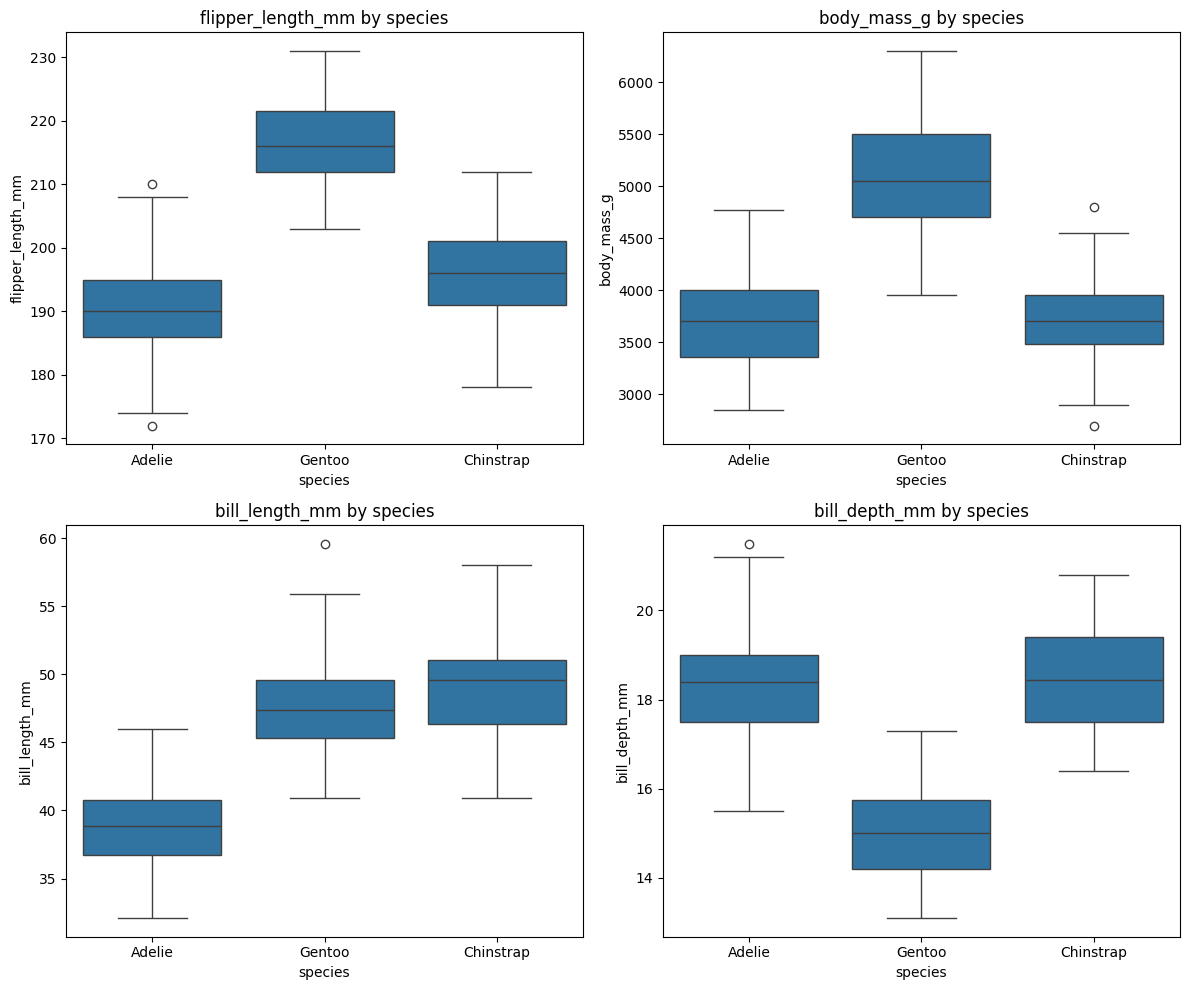

In [11]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='species', y='flipper_length_mm', data=df)
plt.title('flipper_length_mm by species')

plt.subplot(2, 2, 2)
sns.boxplot(x='species', y='body_mass_g', data=df)
plt.title('body_mass_g by species')

plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='bill_length_mm', data=df)
plt.title('bill_length_mm by species')

plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='bill_depth_mm', data=df)
plt.title('bill_depth_mm by species')

plt.tight_layout()
plt.show()

In the boxplots segregated by species, we observe only a few outliers, which are negligible in number.

As we discussed previously, Gentoo penguins have larger flipper sizes and body mass, while the other two species are similar to each other.

Adelie penguins have the smallest bill length, with the other two species having approximately double the bill length of the Adelie.

The Gentoo's bill depth is the smallest, while the other two species share a similar size range.

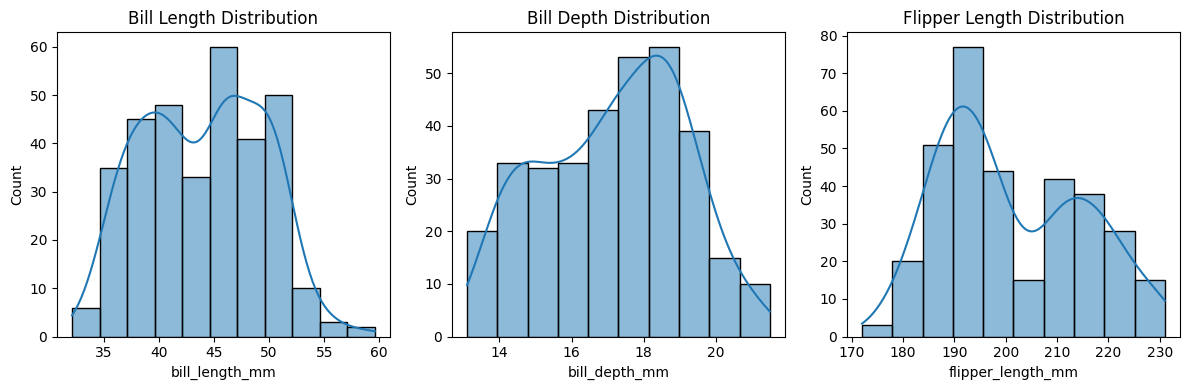

In [12]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(df['bill_length_mm'], kde=True)
plt.title('Bill Length Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['bill_depth_mm'], kde=True)
plt.title('Bill Depth Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['flipper_length_mm'], kde=True)
plt.title('Flipper Length Distribution')

plt.tight_layout()
plt.show()

The mixed-species histograms of bill length, bill depth, and flipper length distributions are clearly multimodal; therefore, we can't extract much information from them. This is due to the different modes of the species, as we will see below in the scatterplot.

<Figure size 1200x1000 with 0 Axes>

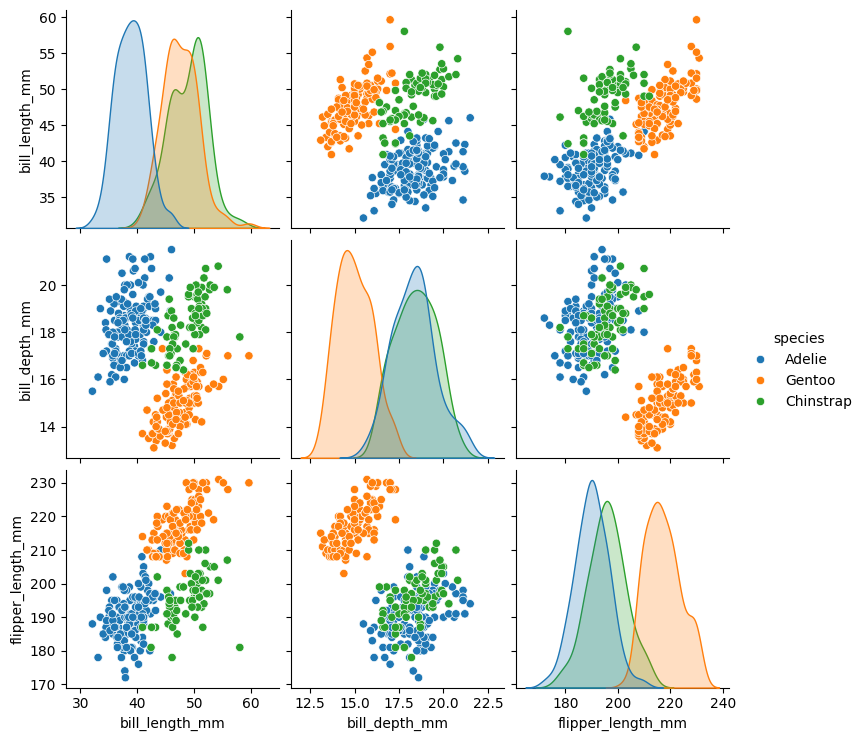

In [13]:
cols_to_plot = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'species']
df2 = df[cols_to_plot].copy()

plt.figure(figsize=(12, 10))
sns.pairplot(df2, hue='species', diag_kind='kde', diag_kws={'common_norm': False})
plt.show()

In the pairplot, we can observe distinct body-dimensional distributions for each penguin species. Each distribution has its own norm, allowing us to appreciate their similarities in shape and range width:

* Bill Length: Adélie's bill length is left-displaced, indicating that it has a shorter bill compared to the other two species, which are similar to each other.
* Bill Depth: Gentoo's range is left-displaced, while the other two species overlap. Gentoo has the shortest bill depth.
* Flipper Length: Gentoo's range is right-displaced, with the other two species overlapping. Gentoo has the longest flippers, while the other two are similar to one another.

The scatterplots reveal a positive correlation for almost all body size-related dimensions (the larger the penguin, the larger its flippers, beak, etc.). We observe three clusters that tend not to overlap; however, there is complete overlap in bill depth between Adélie and Chinstrap penguins, while Gentoo is clearly separated.

---
## Conclusions

Across this brief study we can arrive the next conclusions:

* **Population Distribution**: Adelie penguins are the most numerous, followed by Gentoo and Chinstrap species. It could indicate the Adelie penguins adaptability to the environment or successful breeding strategies compared to Gentoo and Chinstrap penguins. Additionally, Biscoe Island accounts for nearly half of the total population, while Torgersen Island has the smallest share at just 14%.

* **Morphological Correlations**: A scatterplot of flipper length versus body mass shows a positive correlation, indicating that larger penguins tend to have bigger flippers. Adelie and Chinstrap penguins overlap in size, while Gentoo penguins are slightly larger.

* **Sex Ratio**: The male-to-female ratio is balanced at 1:1 for most species, except for Gentoo penguins, which have a slightly higher proportion of males. Although the difference is small, investigating the causes of this imbalance could shed light in environmental pressures.

* **Body Dimensions**: Adelie penguins have the shortest bill length, while Gentoo penguins have the smallest bill depth. Gentoo species also exhibit larger flipper sizes compared to the other two species.

* **Distribution Patterns**: The mixed-species histograms indicate distinct distributions for bill length, bill depth, and flipper length for individual species, reflecting their unique characteristics.

---

## Future Steps:

There is room for improvement:

* Acquiring more info from other sources for data expansion.

* Time related census divided in season, for a more comprehensive behavioural study.

* More granularity, including data such as age, mating habits and chick survival would improve extensivelly our penguin populations related knowledge.